In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
tax_data=pd.read_csv('../data/19zpallagi.csv',header = None)
tax_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
1,01,AL,00000,1,778210.0000,491030.0000,84770.0000,189600.0000,712890.0000,30670.0000,...,0.0000,0.0000,62720.0000,51936.0000,671860.0000,1700965.0000,669570.0000,1694792.0000,1980.0000,3512.0000
2,01,AL,00000,2,525940.0000,247140.0000,123910.0000,139860.0000,481760.0000,18960.0000,...,0.0000,0.0000,85860.0000,122569.0000,438020.0000,1274802.0000,435210.0000,1266557.0000,3670.0000,7410.0000
3,01,AL,00000,3,285700.0000,105140.0000,128140.0000,44560.0000,260570.0000,10670.0000,...,0.0000,0.0000,73980.0000,154932.0000,212040.0000,575315.0000,208470.0000,564202.0000,5020.0000,13653.0000
4,01,AL,00000,4,179070.0000,38820.0000,123110.0000,13740.0000,164300.0000,5020.0000,...,0.0000,0.0000,51330.0000,139065.0000,126850.0000,401581.0000,123310.0000,388749.0000,3040.0000,10377.0000


In [5]:
print("Data Length: ",len(tax_data) )
print("Data Shape: ",tax_data.shape)

('Data Length: ', 166160)
('Data Shape: ', (166160, 152))


In [6]:
tax_df = tax_data.iloc[:,[19,21,27,29,31,60,65,97,111]].copy()
tax_df.head()

,19,21,27,29,31,60,65,97,111
0,A00100,A02650,A00600,A00650,A00700,A04450,N04470,A04800,A07230
1,10158838.000,10311099.000,65753.0000,42751.0000,946.0000,11066587.000,7240.0000,1552000.0000,11110.0000
2,18974967.000,19145621.000,89999.0000,61055.0000,4987.0000,8603871.0000,19940.0000,9872820.0000,42387.0000
3,17535801.000,17690402.000,127351.0000,88608.0000,10995.0000,5038262.0000,25750.0000,11839199.000,26624.0000
4,15546951.000,15670456.000,138559.0000,97921.0000,10393.0000,3496792.0000,19220.0000,11417855.000,19029.0000


In [7]:
tax_df.columns = ["Adjust_gross_income","Total_income","Ordinary_dividends","Qualified_dividends","State_and_local_income_tax_refunds","standard_deduction","itemized_deductions","Taxable_income","education_credit"]
tax_df.head()

,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
0,A00100,A02650,A00600,A00650,A00700,A04450,N04470,A04800,A07230
1,10158838.000,10311099.000,65753.0000,42751.0000,946.0000,11066587.000,7240.0000,1552000.0000,11110.0000
2,18974967.000,19145621.000,89999.0000,61055.0000,4987.0000,8603871.0000,19940.0000,9872820.0000,42387.0000
3,17535801.000,17690402.000,127351.0000,88608.0000,10995.0000,5038262.0000,25750.0000,11839199.000,26624.0000
4,15546951.000,15670456.000,138559.0000,97921.0000,10393.0000,3496792.0000,19220.0000,11417855.000,19029.0000


In [8]:
tax_df = tax_df.drop(labels = 0, axis = 0)
tax_df.head()

,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
1,10158838.000,10311099.000,65753.0000,42751.0000,946.0000,11066587.000,7240.0000,1552000.0000,11110.0000
2,18974967.000,19145621.000,89999.0000,61055.0000,4987.0000,8603871.0000,19940.0000,9872820.0000,42387.0000
3,17535801.000,17690402.000,127351.0000,88608.0000,10995.0000,5038262.0000,25750.0000,11839199.000,26624.0000
4,15546951.000,15670456.000,138559.0000,97921.0000,10393.0000,3496792.0000,19220.0000,11417855.000,19029.0000
5,34974856.000,35286228.000,482082.0000,359323.0000,41044.0000,4830219.0000,53360.0000,28154883.000,29178.0000


In [9]:
tax_df['Adjust_gross_income'] =tax_df['Adjust_gross_income'].astype(float)
tax_df['Total_income'] =tax_df['Total_income'].astype(float)
tax_df['Ordinary_dividends'] =tax_df['Ordinary_dividends'].astype(float)
tax_df['Qualified_dividends'] =tax_df['Qualified_dividends'].astype(float)
tax_df['State_and_local_income_tax_refunds'] =tax_df['State_and_local_income_tax_refunds'].astype(float)
tax_df['standard_deduction'] =tax_df['standard_deduction'].astype(float)
tax_df['itemized_deductions'] =tax_df['itemized_deductions'].astype(float)
tax_df['Taxable_income'] =tax_df['Taxable_income'].astype(float)
tax_df['education_credit'] =tax_df['education_credit'].astype(float)

In [10]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166159 entries, 1 to 166159
Data columns (total 9 columns):
Adjust_gross_income                   166159 non-null float64
Total_income                          166159 non-null float64
Ordinary_dividends                    166159 non-null float64
Qualified_dividends                   166159 non-null float64
State_and_local_income_tax_refunds    166159 non-null float64
standard_deduction                    166159 non-null float64
itemized_deductions                   166159 non-null float64
Taxable_income                        166159 non-null float64
education_credit                      166159 non-null float64
dtypes: float64(9)
memory usage: 12.7 MB


In [11]:
tax_df.describe()

,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
count,1.661590e+05,1.661590e+05,1.661590e+05,1.661590e+05,166159.000000,1.661590e+05,1.661590e+05,1.661590e+05,166159.000000
mean,1.448890e+05,1.465601e+05,3.562787e+03,2.621019e+03,58.762162,2.820882e+04,2.054240e+02,1.093810e+05,100.247329
std,3.411411e+06,3.449896e+06,1.279875e+05,9.530995e+04,2022.955247,5.473323e+05,5.001039e+03,2.891014e+06,2078.473316
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.556000e+03,4.610500e+03,0.000000e+00,0.000000e+00,0.000000,1.265000e+03,0.000000e+00,2.213000e+03,0.000000
50%,1.697200e+04,1.717500e+04,1.450000e+02,9.300000e+01,0.000000,4.404000e+03,2.000000e+01,9.629000e+03,0.000000
75%,6.707800e+04,6.793600e+04,7.340000e+02,4.990000e+02,17.000000,1.681550e+04,9.000000e+01,4.254650e+04,54.000000
max,7.683582e+08,7.773145e+08,2.945888e+07,2.176990e+07,565045.000000,7.411057e+07,1.093540e+06,6.856718e+08,289464.000000


In [12]:
tax_df.corr()

,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
Adjust_gross_income,1.000000,0.999999,0.902298,0.894718,0.698758,0.515846,0.908945,0.991921,0.515584
Total_income,0.999999,1.000000,0.902290,0.894700,0.698899,0.516256,0.908929,0.991869,0.515524
Ordinary_dividends,0.902298,0.902290,1.000000,0.999398,0.500624,0.234683,0.696357,0.932158,0.170751
Qualified_dividends,0.894718,0.894700,0.999398,1.000000,0.489033,0.222245,0.685479,0.925943,0.157675
State_and_local_income_tax_refunds,0.698758,0.698899,0.500624,0.489033,1.000000,0.391587,0.894987,0.679969,0.464748
standard_deduction,0.515846,0.516256,0.234683,0.222245,0.391587,1.000000,0.556001,0.404446,0.855627
itemized_deductions,0.908945,0.908929,0.696357,0.685479,0.894987,0.556001,1.000000,0.883715,0.622580
Taxable_income,0.991921,0.991869,0.932158,0.925943,0.679969,0.404446,0.883715,1.000000,0.418017
education_credit,0.515584,0.515524,0.170751,0.157675,0.464748,0.855627,0.622580,0.418017,1.000000


Correlation map


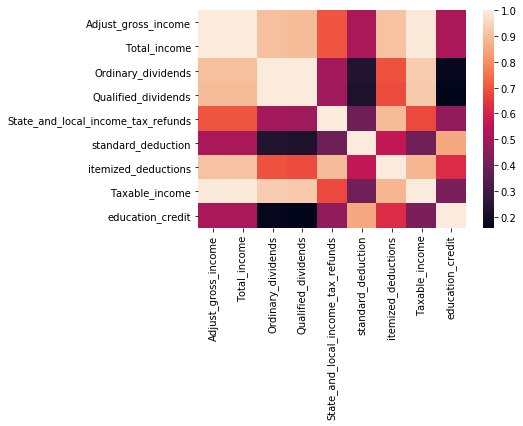

In [13]:
print("Correlation map")
sns.heatmap(tax_df.corr())

In [14]:
#tax_df.to_csv("taxInformation")

In [15]:
#taxByState_df.to_csv("MedianIncome")

NameError: name 'taxByState_df' is not defined

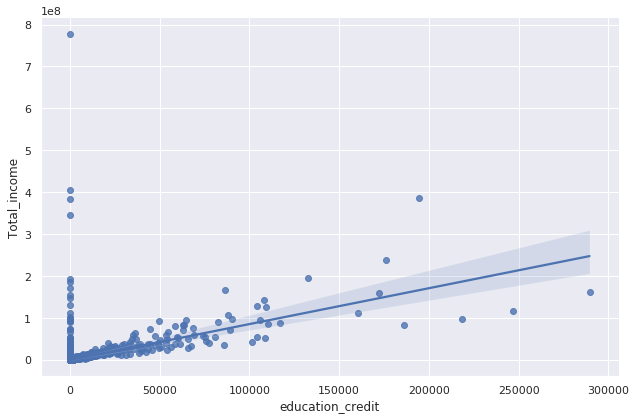

In [35]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,30.27)})
ax.set_title("education_credit vs. Total_income")
ax.set_xlabel("Total_income");
sns.lmplot(x="education_credit", y="Total_income", data=tax_df,height=6,aspect=1.5);

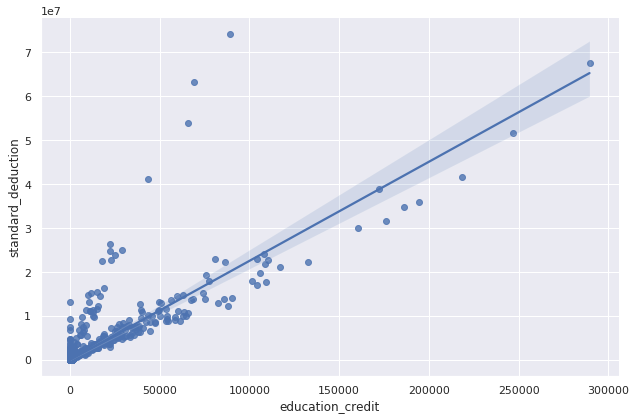

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,30.27)})
ax.set_title("education_credit vs. standard_deduction")
ax.set_xlabel("standard_deduction");
sns.lmplot(x="education_credit", y="standard_deduction", data=tax_df,height=6,aspect=1.5);

In [132]:
tax_df1 = tax_data.iloc[:,[0,1,2,3,19,21,27,29,31,60,65,97,111]].copy()
tax_df1.columns = ["STATEFIPS","STATE","zipcode","agi_stub","Adjust_gross_income","Total_income","Ordinary_dividends","Qualified_dividends","State_and_local_income_tax_refunds","standard_deduction","itemized_deductions","Taxable_income","education_credit"]
tax_df1 = tax_df1.drop(labels = 0, axis = 0)

tax_df1['Adjust_gross_income'] =tax_df1['Adjust_gross_income'].astype(float)
tax_df1['Total_income'] =tax_df1['Total_income'].astype(float)
tax_df1['Ordinary_dividends'] =tax_df1['Ordinary_dividends'].astype(float)
tax_df1['Qualified_dividends'] =tax_df1['Qualified_dividends'].astype(float)
tax_df1['State_and_local_income_tax_refunds'] =tax_df1['State_and_local_income_tax_refunds'].astype(float)
tax_df1['standard_deduction'] =tax_df1['standard_deduction'].astype(float)
tax_df1['itemized_deductions'] =tax_df1['itemized_deductions'].astype(float)
tax_df1['Taxable_income'] =tax_df1['Taxable_income'].astype(float)
tax_df1['education_credit'] =tax_df1['education_credit'].astype(float)


In [133]:
tax_df1.head()

,STATEFIPS,STATE,zipcode,agi_stub,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
1,01,AL,00000,1,10158838.0,10311099.0,65753.0,42751.0,946.0,11066587.0,7240.0,1552000.0,11110.0
2,01,AL,00000,2,18974967.0,19145621.0,89999.0,61055.0,4987.0,8603871.0,19940.0,9872820.0,42387.0
3,01,AL,00000,3,17535801.0,17690402.0,127351.0,88608.0,10995.0,5038262.0,25750.0,11839199.0,26624.0
4,01,AL,00000,4,15546951.0,15670456.0,138559.0,97921.0,10393.0,3496792.0,19220.0,11417855.0,19029.0
5,01,AL,00000,5,34974856.0,35286228.0,482082.0,359323.0,41044.0,4830219.0,53360.0,28154883.0,29178.0


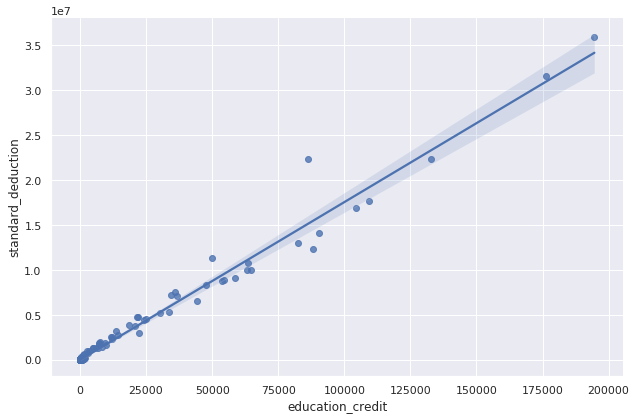

In [134]:
tax_df5 = tax_df1[tax_df1["agi_stub"]==5]

sns.set(rc={'figure.figsize':(20.7,30.27)})
ax.set_title("education_credit vs. standard_deduction")
ax.set_xlabel("standard_deduction");
sns.lmplot(x="education_credit", y="standard_deduction", data=tax_df5,height=6,aspect=1.5);

In [135]:
tax_df1 = tax_data.iloc[:,[0,1,2,3,19,21,27,29,31,60,65,97,111]].copy()
tax_df1.columns = ["STATEFIPS","STATE","zipcode","agi_stub","Adjust_gross_income","Total_income","Ordinary_dividends","Qualified_dividends","State_and_local_income_tax_refunds","standard_deduction","itemized_deductions","Taxable_income","education_credit"]
tax_df1 = tax_df1.drop(labels = 0, axis = 0)

tax_df1['Adjust_gross_income'] =tax_df1['Adjust_gross_income'].astype(float)
tax_df1['Total_income'] =tax_df1['Total_income'].astype(float)
tax_df1['Ordinary_dividends'] =tax_df1['Ordinary_dividends'].astype(float)
tax_df1['Qualified_dividends'] =tax_df1['Qualified_dividends'].astype(float)
tax_df1['State_and_local_income_tax_refunds'] =tax_df1['State_and_local_income_tax_refunds'].astype(float)
tax_df1['standard_deduction'] =tax_df1['standard_deduction'].astype(float)
tax_df1['itemized_deductions'] =tax_df1['itemized_deductions'].astype(float)
tax_df1['Taxable_income'] =tax_df1['Taxable_income'].astype(float)
tax_df1['education_credit'] =tax_df1['education_credit'].astype(float)



In [136]:
tax_df2 = tax_df1[tax_df1["agi_stub"]==1]
tax_df2.head()

,STATEFIPS,STATE,zipcode,agi_stub,Adjust_gross_income,Total_income,Ordinary_dividends,Qualified_dividends,State_and_local_income_tax_refunds,standard_deduction,itemized_deductions,Taxable_income,education_credit
4098,4,AZ,85137,1,3341.0,3341.0001,21.0,8.0,0.0,3872.0,0.0,464.0,0.0
4104,4,AZ,85138,1,72142.0,73255.0000,486.0,277.0,0.0,78742.0,120.0,12165.0,69.0
4110,4,AZ,85139,1,35091.0,35519.0000,164.0,65.0,0.0,37886.0,40.0,6304.0,36.0
4116,4,AZ,85140,1,62675.0,63649.0000,558.0,328.0,23.0,66797.0,100.0,10675.0,73.0
4122,4,AZ,85142,1,106537.0,108663.0000,1089.0,632.0,30.0,110148.0,200.0,19396.0,194.0


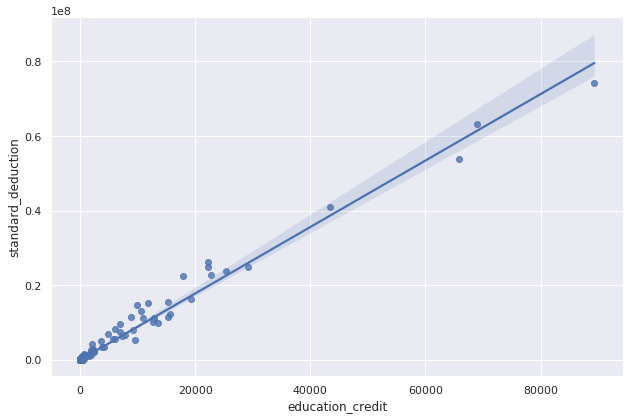

In [137]:

sns.set(rc={'figure.figsize':(20.7,30.27)})
ax.set_title("education_credit vs. standard_deduction")
ax.set_xlabel("standard_deduction");
sns.lmplot(x="education_credit", y="standard_deduction", data=tax_df2,height=6,aspect=1.5);